<a href="https://colab.research.google.com/github/Ioiofmanzali/GLOBAL_SOLUTION_2_-GRUPO81TIAO/blob/main/desastres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# CARREGAMENTO DOS DATASETS:

df1 = dataset com o historico de desastres da cidade de São Paulo

In [20]:
df1 = pd.read_csv('/content/desastres_sp.csv', sep = ';')


In [21]:
# utilizada função display para mostrar o dataset em formatação de Tabela
display(df1)

,DATA_EVENTO,TIPO_EVENTO,ÓBITOS,FERIDOS,ENFERMOS,DESABRIGADOS,DESALOJADOS,DESAPARECIDOS,RESIDENCIAS_DANIFICADAS,RESIDENCIAS_DESTRUIDAS,DANO_PATRIMONIO_PL
0,20/02/1993,Enxurradas,0,0,0,0,12,0,0,0,0
1,07/02/1994,Enxurradas,4,0,0,200,0,2,0,0,0
2,08/12/1994,Enxurradas,0,0,0,260,0,0,0,0,0
3,01/02/1995,Enxurradas,0,0,0,400,30,0,0,0,0
4,09/01/1996,Enxurradas,4,0,0,334,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67,31/01/2025,Alagamentos,0,0,0,0,190,0,0,45,7
68,04/04/2025,Alagamentos,0,0,0,0,23,1,0,12,0
69,10/04/2025,Chuvas Intensas,0,2,0,0,15,0,0,5,1
70,18/04/2025,Inundações,7,5,0,2,65,0,0,41,3


# TRATAMENTO DOS DATASETS



# NORMATIZAÇÃO DO DF 1

In [22]:
df1.info()
df1.isnull().sum()
duplicates1 = df1.duplicated().sum()
print(f'O número de dados duplicados é: {duplicates1}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DATA_EVENTO              72 non-null     object
 1   TIPO_EVENTO              72 non-null     object
 2   ÓBITOS                   72 non-null     int64 
 3   FERIDOS                  72 non-null     int64 
 4   ENFERMOS                 72 non-null     int64 
 5   DESABRIGADOS             72 non-null     int64 
 6   DESALOJADOS              72 non-null     int64 
 7   DESAPARECIDOS            72 non-null     int64 
 8   RESIDENCIAS_DANIFICADAS  72 non-null     int64 
 9   RESIDENCIAS_DESTRUIDAS   72 non-null     int64 
 10  DANO_PATRIMONIO_PL       72 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 6.3+ KB
O número de dados duplicados é: 0


normatizando a coluna data para datetime do df1

###### 1.4 MEDIDAS DE TENDENCIA CENTRAL E QUARTIS DO DATASET

In [23]:
display(df1.describe())

,ÓBITOS,FERIDOS,ENFERMOS,DESABRIGADOS,DESALOJADOS,DESAPARECIDOS,RESIDENCIAS_DANIFICADAS,RESIDENCIAS_DESTRUIDAS,DANO_PATRIMONIO_PL
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1.111111,2.527778,19.722222,82.000000,355.236111,0.319444,186.416667,18.430556,195.347222
std,2.172527,12.433454,150.473733,273.666704,1680.483176,1.701916,946.159855,102.799384,1654.349752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,105.000000,1271.000000,1500.000000,12220.000000,12.000000,6050.000000,815.000000,14038.000000


# ANALISE EXPLORATORIA DO DF 1

In [24]:
print("--- Visão Geral do DataFrame desastre_sp ---")
print(df1.info())
print("\n--- Estatísticas Descritivas das Colunas Numéricas ---")
print(df1.describe())

--- Visão Geral do DataFrame desastre_sp ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DATA_EVENTO              72 non-null     object
 1   TIPO_EVENTO              72 non-null     object
 2   ÓBITOS                   72 non-null     int64 
 3   FERIDOS                  72 non-null     int64 
 4   ENFERMOS                 72 non-null     int64 
 5   DESABRIGADOS             72 non-null     int64 
 6   DESALOJADOS              72 non-null     int64 
 7   DESAPARECIDOS            72 non-null     int64 
 8   RESIDENCIAS_DANIFICADAS  72 non-null     int64 
 9   RESIDENCIAS_DESTRUIDAS   72 non-null     int64 
 10  DANO_PATRIMONIO_PL       72 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 6.3+ KB
None

--- Estatísticas Descritivas das Colunas Numéricas ---
          ÓBITOS     FERIDOS     ENFERMOS  DESABRIGA

In [25]:
# Converter 'DATA_EVENTO' para datetime e renomear para 'DATA'
# Verifica se a coluna 'DATA_EVENTO' existe para evitar KeyErrors
if 'DATA_EVENTO' in df1.columns:
    df1['DATA_EVENTO'] = pd.to_datetime(df1['DATA_EVENTO'], dayfirst=True, errors='coerce')
    df1 = df1.rename(columns={'DATA_EVENTO': 'DATA'})
    print("Coluna 'DATA_EVENTO' convertida para datetime e renomeada para 'DATA'.")
elif 'DATA' in df1.columns: # Se já for 'DATA', apenas converte
    df1['DATA'] = pd.to_datetime(df1['DATA'], dayfirst=True, errors='coerce')
    print("Coluna 'DATA' convertida para datetime.")
else:
    print("AVISO: Nenhuma coluna 'DATA' ou 'DATA_EVENTO' encontrada para conversão. Verifique seu DataFrame.")

Coluna 'DATA_EVENTO' convertida para datetime e renomeada para 'DATA'.


In [26]:
# Normalização Textual da Coluna 'TIPO_EVENTO'
print("\nIniciando normalização textual da coluna 'TIPO_EVENTO'...")
# Primeiro, garantir que a coluna 'TIPO_EVENTO' exista antes de tentar processá-la
if 'TIPO_EVENTO' in df1.columns:
    df1['TIPO_EVENTO'] = df1['TIPO_EVENTO'].astype(str).str.lower().str.strip()
    df1['TIPO_EVENTO'] = df1['TIPO_EVENTO'].str.replace(r'\s+', ' ', regex=True)

    # ***AJUSTE ESTE DICIONÁRIO 'mapeamento_eventos' PARA SEUS DADOS REAIS!***
    # Este dicionário ajuda a padronizar variações no nome dos eventos (ex: "chuva forte" vira "chuva intensa")
    mapeamento_eventos = {
        'Chuvas intensas': 'chuva intensa',
        'Alagamentos': 'alagamento',
        'Inundações': 'inundação',
        'Enxurradas': 'enxurrada',
        'movimento de massa': 'movimento de massa',

    }
    df1['TIPO_EVENTO_PADRONIZADO'] = df1['TIPO_EVENTO'].replace(mapeamento_eventos)
    print("Normalização textual de 'TIPO_EVENTO' concluída.")

    # Aplicar One-Hot Encoding
    print("\nAplicando One-Hot Encoding na coluna 'TIPO_EVENTO_PADRONIZADO'...")
    # Forçando dtype=int para garantir que as colunas sejam numéricas (0 ou 1)
    df_eventos_encoded = pd.get_dummies(df1['TIPO_EVENTO_PADRONIZADO'], prefix='TIPO', dtype=int)

    # Concatena as novas colunas numéricas de volta ao DataFrame original df1
    df1 = pd.concat([df1, df_eventos_encoded], axis=1)

    # Remover colunas temporárias/originais de texto se não forem mais necessárias
    df1 = df1.drop(columns=['TIPO_EVENTO', 'TIPO_EVENTO_PADRONIZADO'], errors='ignore')
    print("One-Hot Encoding concluído. Colunas 'TIPO_' adicionadas ao df1.")
else:
    print("\nAVISO: Coluna 'TIPO_EVENTO' não encontrada no df1. One-Hot Encoding não será aplicado e gráficos de tipo de evento não serão gerados.")

print("\n--- Verificação final do df1 após pré-processamento ---")
print(df1.info())
print("\nPrimeiras linhas do df1:")
print(df1.head())



Iniciando normalização textual da coluna 'TIPO_EVENTO'...
Normalização textual de 'TIPO_EVENTO' concluída.

Aplicando One-Hot Encoding na coluna 'TIPO_EVENTO_PADRONIZADO'...
One-Hot Encoding concluído. Colunas 'TIPO_' adicionadas ao df1.

--- Verificação final do df1 após pré-processamento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     72 non-null     datetime64[ns]
 1   ÓBITOS                   72 non-null     int64         
 2   FERIDOS                  72 non-null     int64         
 3   ENFERMOS                 72 non-null     int64         
 4   DESABRIGADOS             72 non-null     int64         
 5   DESALOJADOS              72 non-null     int64         
 6   DESAPARECIDOS            72 non-null     int64         
 7   RESIDENCIAS_DANIFICADAS  72 non-null     int64 

# VISUALIZAÇÃO GRÁFICA DATAFRAME 1: DESATRES_SP


--- Gerando gráfico de contagem de ocorrências por Tipo de Evento ---


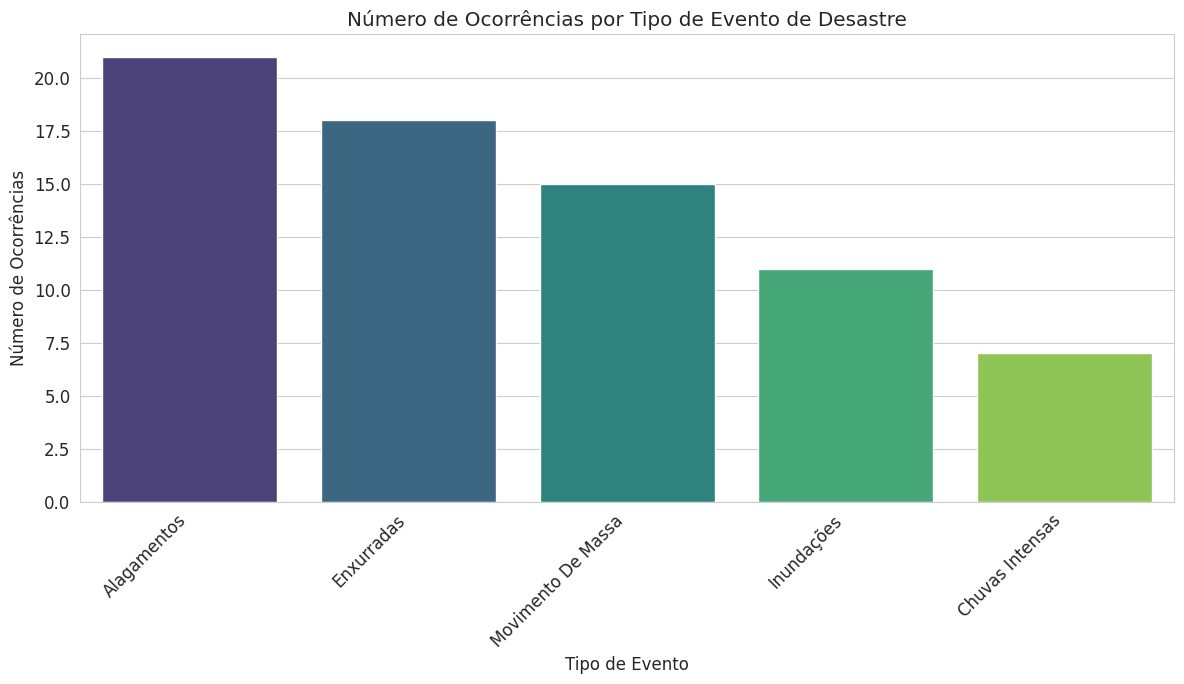


--- Gerando gráficos de impacto (Óbitos, Feridos, Desabrigados) ao longo do tempo ---


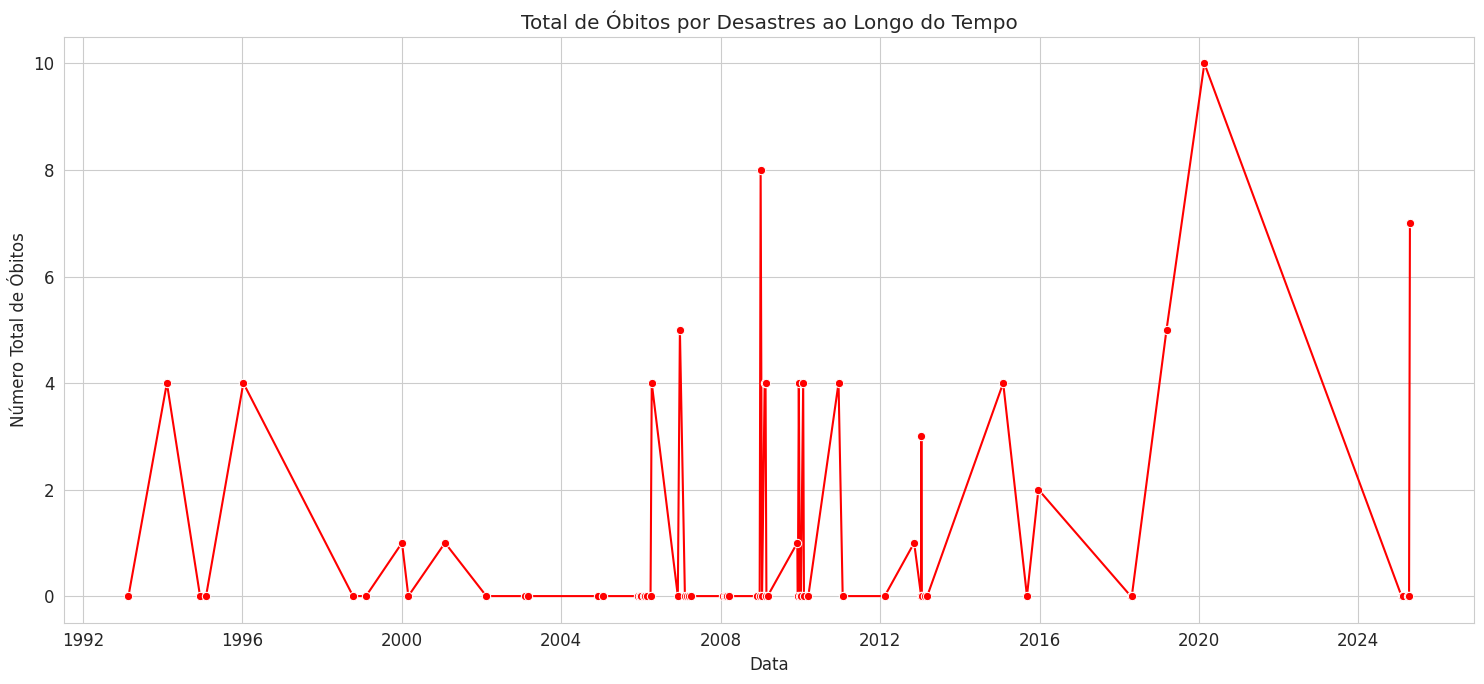

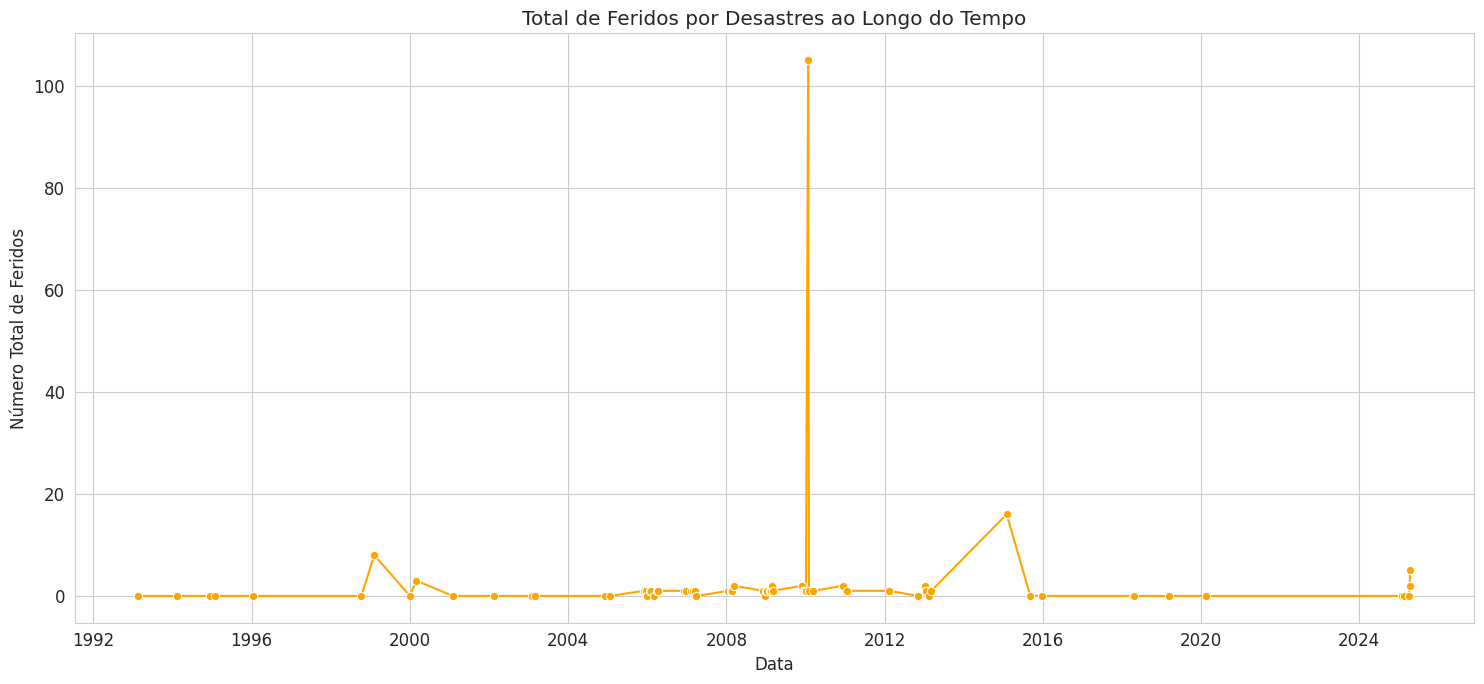

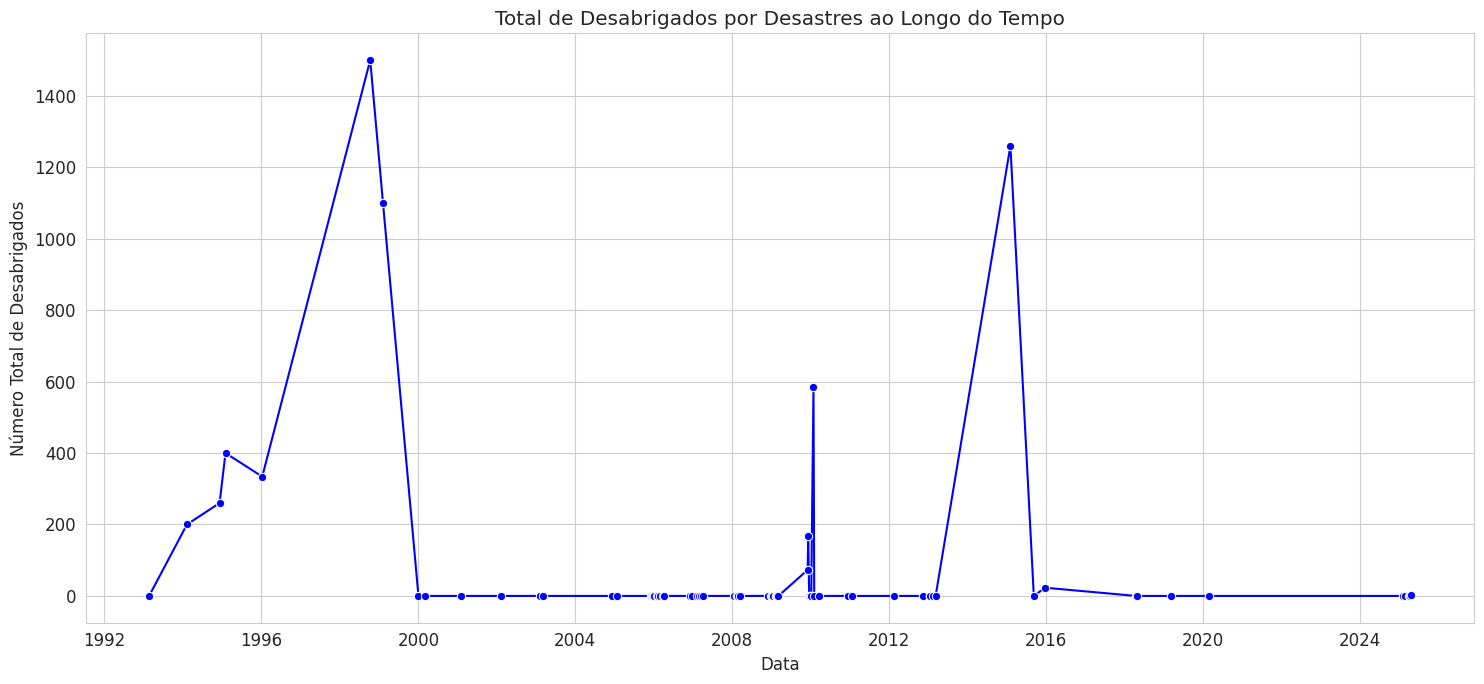


--- Gerando gráfico de Óbitos por Tipo de Evento ---

Impacto Total por Tipo de Evento (dados para o gráfico):
          Tipo_Evento  Obitos_Total  Feridos_Total  Desabrigados_Total
3          Inundações            23            132                1847
1     Chuvas Intensas            17              2                  23
2          Enxurradas            15             16                3867
4  Movimento De Massa            13             15                 167
0         Alagamentos            12             17                   0


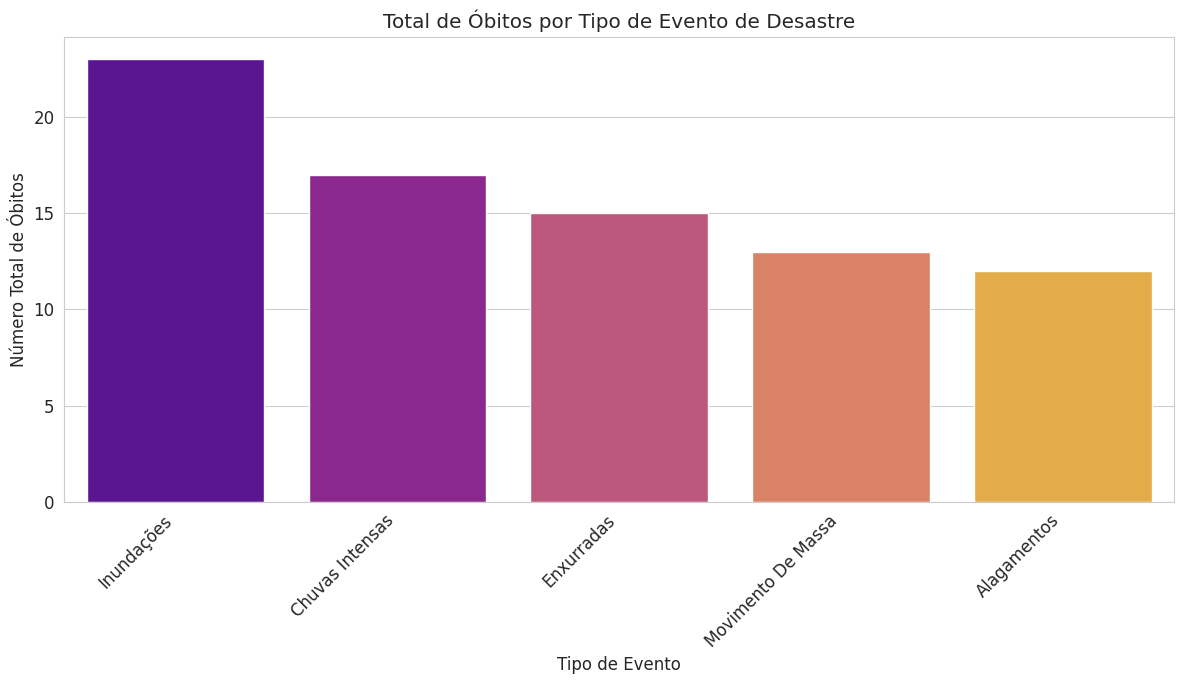

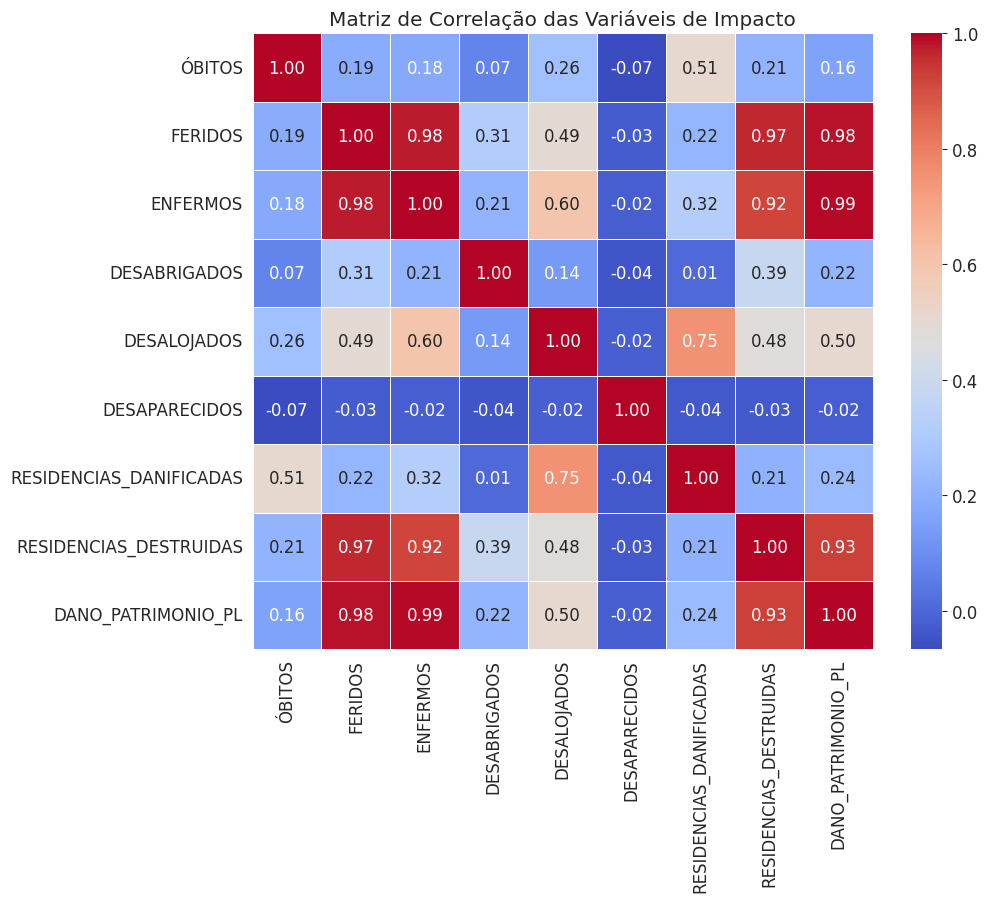


--- Análise Exploratória e Geração de Gráficos Concluída! ---


In [27]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamanho padrão para os gráficos
plt.rcParams['font.size'] = 12 # Tamanho da fonte padrão

# --- GERAÇÃO DOS GRÁFICOS DE ANÁLISE EXPLORATÓRIA ---

# --- Análise da Distribuição dos Tipos de Evento (Gráfico de Barras) ---
print("\n--- Gerando gráfico de contagem de ocorrências por Tipo de Evento ---")
tipo_eventos_cols = [col for col in df1.columns if col.startswith('TIPO_')]

if tipo_eventos_cols: # Verifica se existem colunas 'TIPO_' para plotar
    contagem_eventos = df1[tipo_eventos_cols].sum().sort_values(ascending=False)


    if not contagem_eventos.empty and contagem_eventos.sum() > 0:
        plt.figure(figsize=(12, 7))
        # Remove o prefixo 'TIPO_' e formata os rótulos para o gráfico
        labels = [col.replace('TIPO_', '').replace('_', ' ').title() for col in contagem_eventos.index]
        sns.barplot(x=labels, y=contagem_eventos.values, palette='viridis', hue=labels, legend=False)
        plt.title('Número de Ocorrências por Tipo de Evento de Desastre')
        plt.xlabel('Tipo de Evento')
        plt.ylabel('Número de Ocorrências')
        plt.xticks(rotation=45, ha='right') # Gira os rótulos
        plt.tight_layout() # Ajusta o layout para evitar sobreposição
        plt.show()
    else:
        print("AVISO: A contagem de eventos resultou em dados vazios ou zerados. Gráfico de contagem não gerado.")
else:
    print("AVISO: Nenhuma coluna One-Hot ('TIPO_...') encontrada para o gráfico de contagem.")

# --- 3.2. Impacto dos Eventos ao Longo do Tempo (Gráficos de Linha) ---
print("\n--- Gerando gráficos de impacto (Óbitos, Feridos, Desabrigados) ao longo do tempo ---")

if 'DATA' in df1.columns:
    df1_diario = df1.groupby('DATA').agg(
        Obitos_Total=('ÓBITOS', 'sum'),
        Feridos_Total=('FERIDOS', 'sum'),
        Desabrigados_Total=('DESABRIGADOS', 'sum')
        # Adicione outras colunas de impacto se desejar, ex: 'Residencias_Danificadas_Total':('RESIDENCIAS_DANIFICADAS', 'sum')
    ).reset_index()

    # Gráfico de linha para Óbitos ao longo do tempo
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df1_diario, x='DATA', y='Obitos_Total', marker='o', color='red')
    plt.title('Total de Óbitos por Desastres ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Número Total de Óbitos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico de linha para Feridos ao longo do tempo
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df1_diario, x='DATA', y='Feridos_Total', marker='o', color='orange')
    plt.title('Total de Feridos por Desastres ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Número Total de Feridos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico de linha para Desabrigados ao longo do tempo
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df1_diario, x='DATA', y='Desabrigados_Total', marker='o', color='blue')
    plt.title('Total de Desabrigados por Desastres ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Número Total de Desabrigados')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("AVISO: Coluna 'DATA' não encontrada para gerar gráficos de impacto ao longo do tempo.")


# --- 3.3. Relação entre Tipo de Evento e Impacto (Ex: Óbitos por Tipo de Evento) ---
print("\n--- Gerando gráfico de Óbitos por Tipo de Evento ---")

if tipo_eventos_cols and 'ÓBITOS' in df1.columns: # Garante que as colunas tipo e óbitos existem
    # Cria um DataFrame temporário para calcular o impacto por tipo de evento
    df_impacto_por_tipo = pd.DataFrame(columns=['Tipo_Evento', 'Obitos_Total', 'Feridos_Total', 'Desabrigados_Total'])

    for col in tipo_eventos_cols:
        tipo = col.replace('TIPO_', '').replace('_', ' ').title() # Extrai e formata o nome do tipo de evento
        # Filtra as linhas onde o tipo de evento é 1 (ocorreu) e soma os impactos
        obitos = df1.loc[df1[col] == 1, 'ÓBITOS'].sum()
        feridos = df1.loc[df1[col] == 1, 'FERIDOS'].sum()
        desabrigados = df1.loc[df1[col] == 1, 'DESABRIGADOS'].sum()
        df_impacto_por_tipo.loc[len(df_impacto_por_tipo)] = [tipo, obitos, feridos, desabrigados]

    df_impacto_por_tipo = df_impacto_por_tipo.sort_values(by='Obitos_Total', ascending=False)

    print("\nImpacto Total por Tipo de Evento (dados para o gráfico):")
    print(df_impacto_por_tipo)

    if not df_impacto_por_tipo.empty and df_impacto_por_tipo['Obitos_Total'].sum() > 0:
        plt.figure(figsize=(12, 7))
        sns.barplot(data=df_impacto_por_tipo, x='Tipo_Evento', y='Obitos_Total', palette='plasma', hue='Tipo_Evento', legend=False)
        plt.title('Total de Óbitos por Tipo de Evento de Desastre')
        plt.xlabel('Tipo de Evento')
        plt.ylabel('Número Total de Óbitos')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("AVISO: Dados de óbitos por tipo de evento vazios ou zerados. Gráfico não gerado.")
else:
    print("AVISO: Nenhuma coluna One-Hot ('TIPO_...') ou coluna 'ÓBITOS' encontrada para o gráfico de impacto por tipo de evento.")


colunas_impacto = ['ÓBITOS', 'FERIDOS', 'ENFERMOS', 'DESABRIGADOS', 'DESALOJADOS',
                   'DESAPARECIDOS', 'RESIDENCIAS_DANIFICADAS',
                   'RESIDENCIAS_DESTRUIDAS', 'DANO_PATRIMONIO_PL']

# Remover colunas que possam não existir no seu DF (ex: se só tem 72 linhas, algumas podem ser sempre zero)
# Filtra apenas as colunas que realmente existem no DataFrame
colunas_impacto_existentes = [col for col in colunas_impacto if col in df1.columns]

if colunas_impacto_existentes:
    matriz_correlacao = df1[colunas_impacto_existentes].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação das Variáveis de Impacto')
    plt.show()
else:
    print("AVISO: Nenhuma coluna de impacto válida encontrada para a matriz de correlação.")


print("\n--- Análise Exploratória e Geração de Gráficos Concluída! ---")